In [1]:
#import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data
data= pd.read_csv(r"E:\evaluation\p8\spaceserver.csv")

In [3]:
#Check for top 5 records
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.240000e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.720000e+18,STAR,-0.000009,3306,54922,491
1,1.240000e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.640000e+17,STAR,-0.000055,323,51615,541
2,1.240000e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.230000e+17,GALAXY,0.123111,287,52023,513
3,1.240000e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.720000e+18,STAR,-0.000111,3306,54922,510
4,1.240000e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.720000e+18,STAR,0.000590,3306,54922,512


In [5]:
#Check for no. of rows and columns
data.shape

(10000, 18)

In [6]:
#Check for the null values 
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [9]:
#Check for Column names
data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [10]:
#Check the data type column and Null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [11]:
#Lets count the each category of class column
data['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

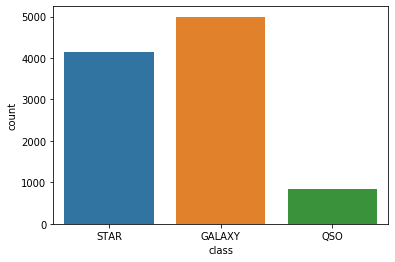

In [12]:
#Lets start with visualization of class
ax= sns.countplot(x='class',data=data)

In [13]:
#Dropping unneccesary columns
data=data.drop(['objid','rerun','specobjid','fiberid'],axis=1)

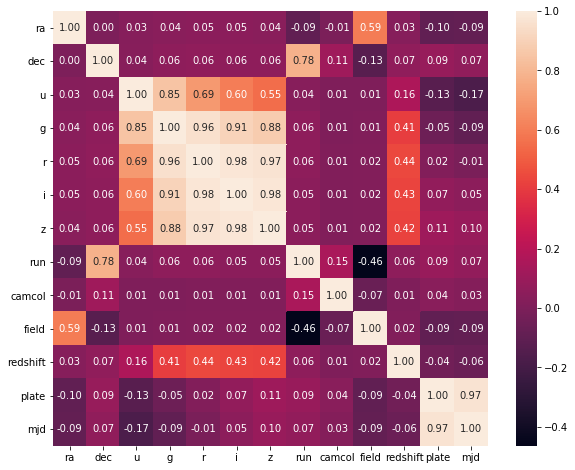

In [14]:
#Heatmap to check correlation
bx = plt.subplots(figsize=(10,8)) 

sns.heatmap(data.corr() , annot=True,square=True,fmt=".2f")

In [15]:
#Check the stats of the dataset
data.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,5.353854,8410.000000,57481.000000


In [16]:
#Convert the class into numerical 
data['class']=data['class'].map({'STAR':0,'GALAXY':1,'QSO':2}).astype(int)

In [17]:
#check stats after conversion
data.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,class,redshift,plate,mjd
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,0.669800,0.143726,1460.986400,52943.533300
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,0.625465,0.388774,1788.778371,1511.150651
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,0.000000,-0.004136,266.000000,51578.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,0.000000,0.000081,301.000000,51900.000000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,1.000000,0.042591,441.000000,51997.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,1.000000,0.092579,2559.000000,54468.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,2.000000,5.353854,8410.000000,57481.000000


In [22]:
#Creating the function
def feature_dist(df0,df1,df2,label0,label1,label2,features):
    plt.figure()
    fig,ax=plt.subplots(13,1,figsize=(8,45))
    i=0
    for ft in features:
        i+=1
        plt.subplot(13,1,i)
        # plt.figure()
        sns.distplot(df0[ft], hist=False,label=label0)
        sns.distplot(df1[ft], hist=False,label=label1)
        sns.distplot(df2[ft], hist=False,label=label2)
        plt.xlabel(ft, fontsize=11)
        #locs, labels = plt.xticks()
        plt.tick_params(axis='x', labelsize=9)
        plt.tick_params(axis='y', labelsize=9)
    plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

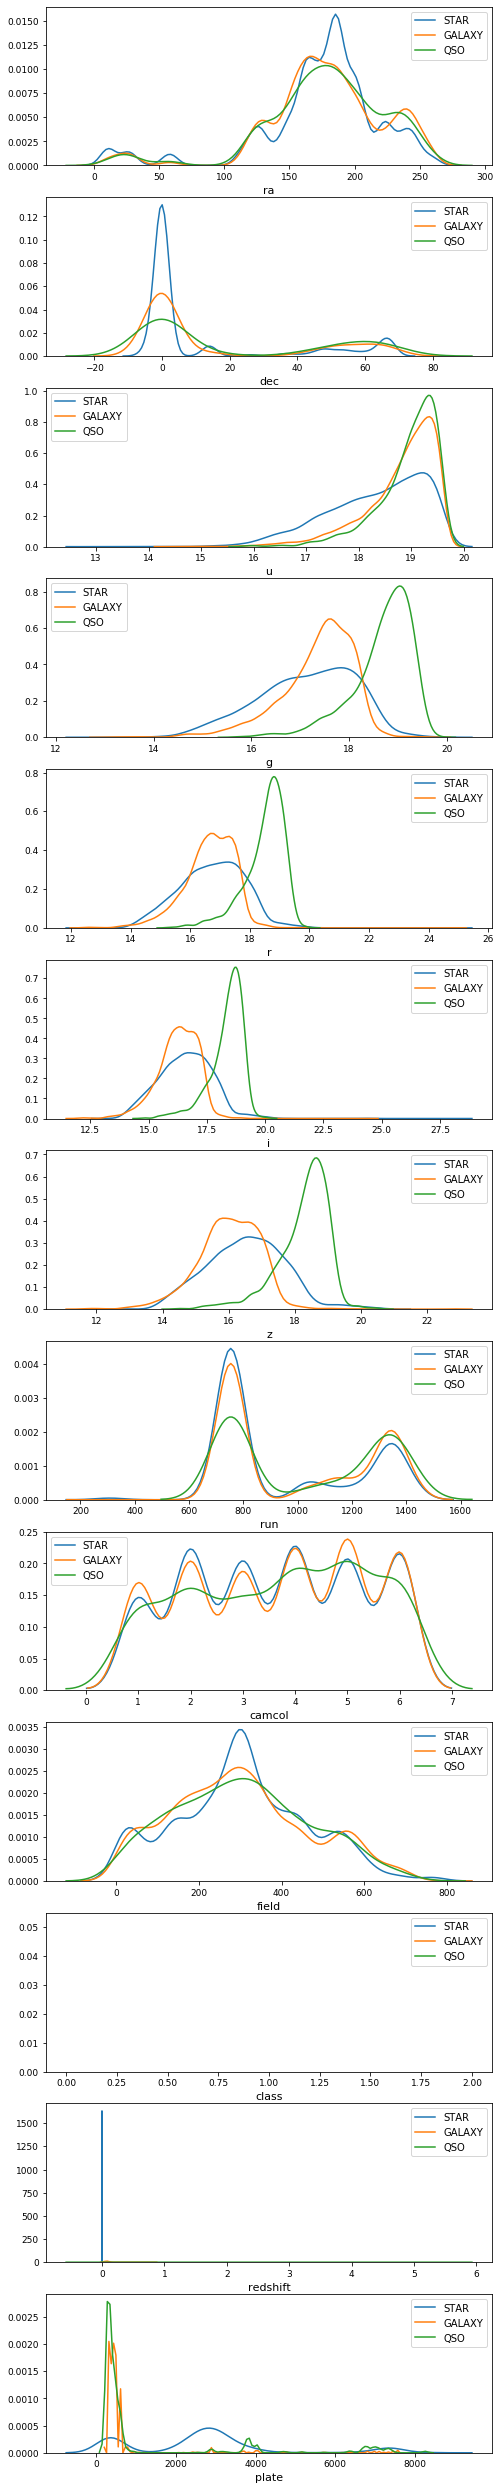

In [23]:
#Plots the graph for class
t0 = data.loc[data['class'] == 0]
t1 = data.loc[data['class'] == 1]
t2 = data.loc[data['class'] == 2]
features = data.columns.values[:13]
feature_dist(t0,t1,t2, 'STAR', 'GALAXY','QSO', features)

In [24]:
#redshift groupby with class
data[['redshift','class']].groupby(['class'],as_index=False).mean().sort_values(by='class',ascending=False)
#observations: for class 2 its the highest


,class,redshift
2,2,1.218366
1,1,0.080325
0,0,0.000043


In [25]:
#Importing Libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [26]:
#Creating the X and y values 
X=data.drop(['class'],axis=1)
y=data['class']

In [27]:
X=StandardScaler().fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=44, shuffle =True)
X_train

array([[-0.93572463,  1.471357  , -1.54334162, ..., -0.22622668,
        -0.56688806, -0.70581092],
       [-0.15402103, -0.54648393,  1.16035207, ..., -0.36756491,
         1.32835484,  1.73946796],
       [-0.05468482, -0.62355222,  0.95827984, ..., -0.36984595,
         0.79164889,  1.04526023],
       ...,
       [ 1.44339239, -0.60824952, -0.76218229, ..., -0.23986549,
        -0.623354  , -0.82757853],
       [-0.04586363,  1.98709129,  0.28679756, ..., -0.20785831,
        -0.48302776, -0.58536687],
       [-0.02855027, -0.64485605, -0.92987184, ..., -0.37003036,
        -0.63341724, -0.43778983]])

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [30]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [31]:

y_pred = random_forest.predict(X_test)

Test_acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 3)
print("Score ",Test_acc_random_forest)
# Observation : We got the final prediction score as 99.1 

Score  99.1


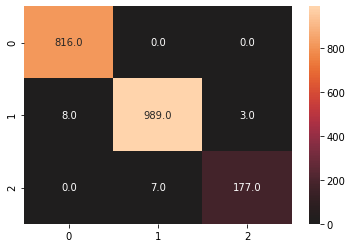

In [32]:
#Just for more lets generate the heatmap for confusion Matrix
sns.heatmap(confusion_matrix(y_test , y_pred), center=True,annot=True,fmt='.1f')